# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, learning_curve

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
data_frame = pd.read_csv(
    "diabetes.csv", 
    encoding="utf-8", 
    sep=",", 
)

In [4]:
data_frame.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


In [6]:
def get_scaled_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(target, axis=1)
  y = df[target]
  
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)

  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = get_scaled_train_data(data_frame, "Diabetes", 0.2)

In [31]:
def generate_learing_curve_plot(model: any, df: pd.DataFrame, target: str = "Diabetes"):
    train_sizes, train_scores, test_scores = learning_curve(
        model, 
        df.drop(target, axis=1),
        df[target],
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), 
        scoring="r2", 
        train_sizes=np.linspace(0.1, 1.0, 10), 
        random_state=42
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score", marker="o")
    plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", marker="o")
    plt.title("Learning Curve")
    plt.xlabel("Training Size")
    plt.ylabel("R2 Score")
    plt.legend()
    plt.grid()

    plt.show()

In [34]:
def generate_feature_importance_plot(model: any, df: pd.DataFrame, target: str = "Diabetes"):
    feature_importance = pd.Series(
        model.feature_importances_, index=df.drop(target, axis=1).columns
    ).sort_values(ascending=False)

    plt.figure(figsize=(10, 10))
    sns.barplot(
        x=feature_importance, 
        y=feature_importance.index, 
        palette="viridis"
    )
    plt.title("Feature Importance")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")

    plt.show()

### AdaBoost

In [53]:
ada_boost = AdaBoostClassifier(
    random_state=42
)

In [ ]:
ada_boost.fit(X_train, y_train)
ada_pred = ada_boost.predict(X_test)

print(f"AdaBoost Accuracy: {accuracy_score(y_test, ada_pred)}")

AdaBoost Accuracy: 0.943089430894309


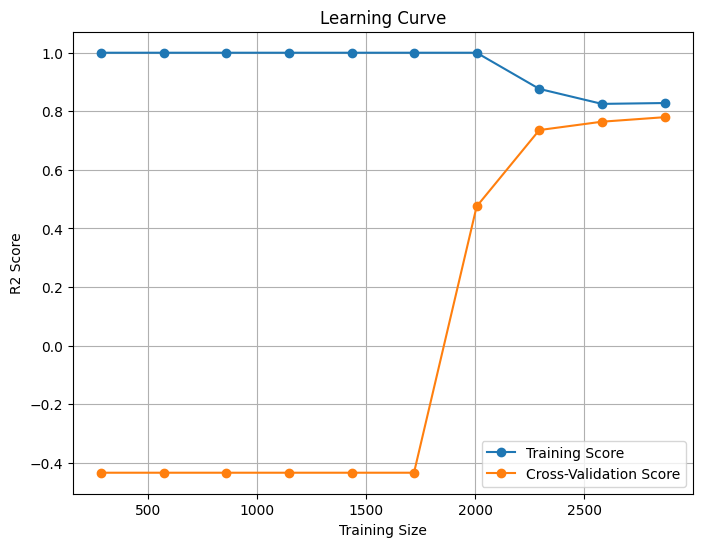

In [55]:
generate_learing_curve_plot(ada_boost, data_frame)

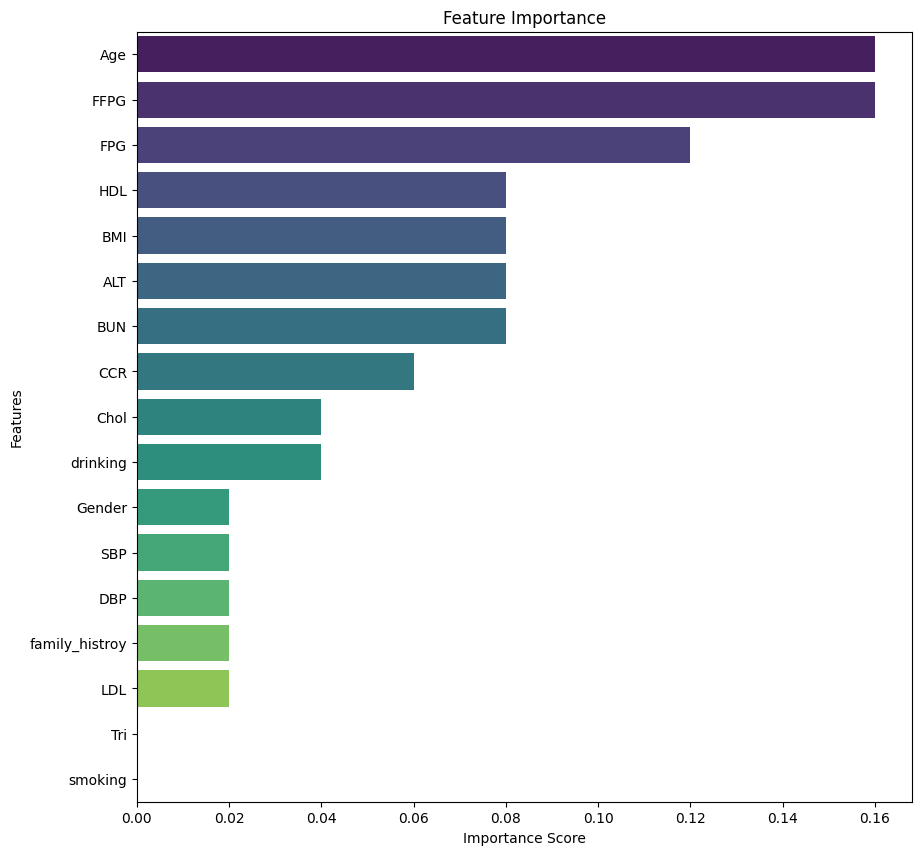

In [56]:
generate_feature_importance_plot(ada_boost, data_frame)

### Gradient Boosting

In [64]:
gradient_boosting = GradientBoostingClassifier(
    random_state=42
)

In [65]:
gradient_boosting.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting.predict(X_test)

print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gradient_boosting_pred)}")

Gradient Boosting Accuracy: 0.9442508710801394


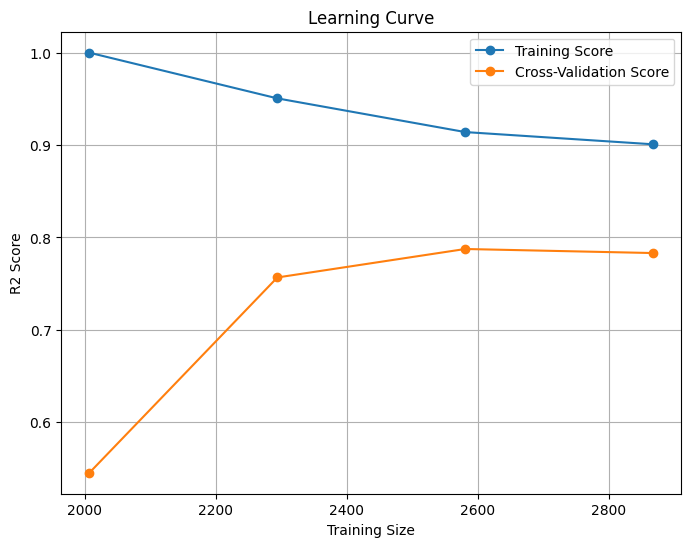

In [66]:
generate_learing_curve_plot(gradient_boosting, data_frame)

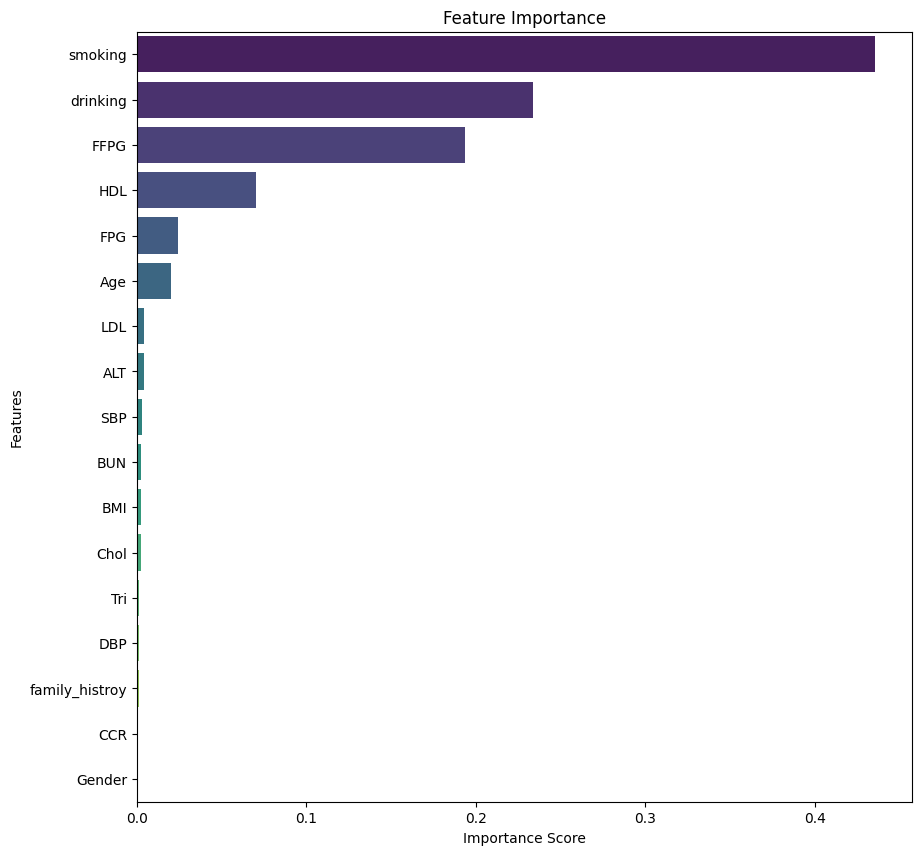

In [67]:
generate_feature_importance_plot(gradient_boosting, data_frame)

### XGBoost

In [ ]:
xgb = XGBClassifier(
    random_state=42
)

In [72]:
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_pred)}")

XGBoost Accuracy: 0.9396051103368177


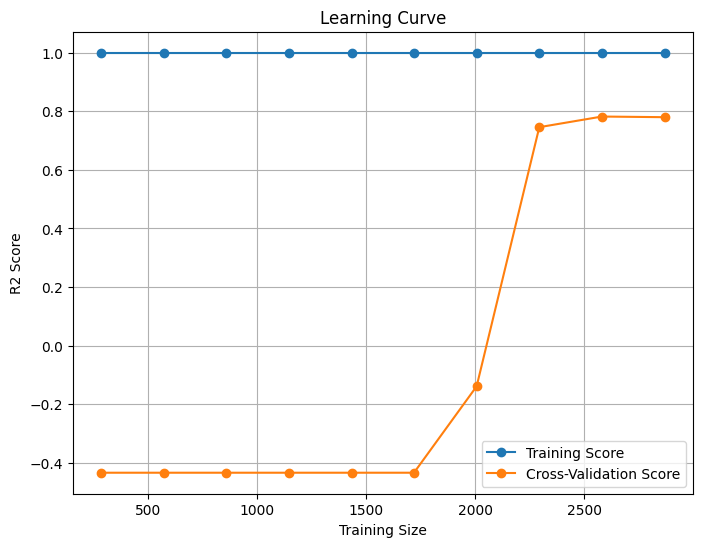

In [70]:
generate_learing_curve_plot(xgb, data_frame)

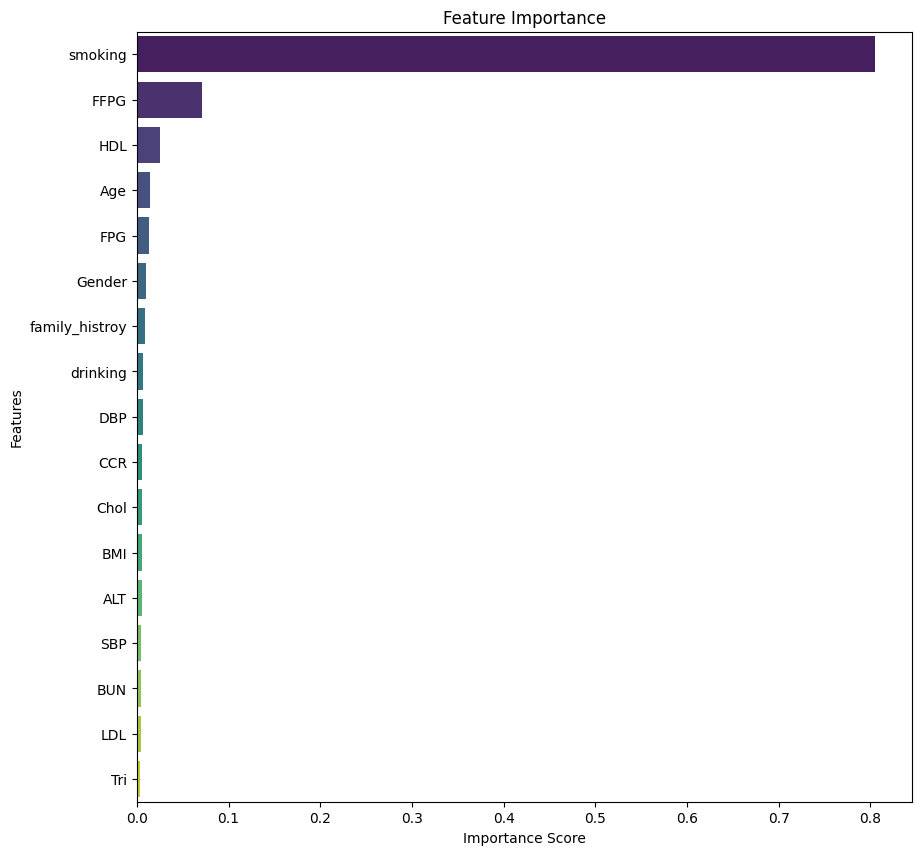

In [73]:
generate_feature_importance_plot(xgb, data_frame)

### AdaBoost with hyperparameter tuning

In [74]:
ada_grid_params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.05]
}

In [ ]:
ada_grid_search = GridSearchCV(
    estimator=ada_boost, 
    param_grid=ada_grid_params, 
    cv=3, 
    scoring="accuracy", 
    n_jobs=-1
)

ada_grid_search.fit(X_train, y_train)

ada_boost_tuned = ada_grid_search.best_estimator_
ada_boost_tuned_pred = ada_boost_tuned.predict(X_test)

print(f"AdaBoost Tuned Accuracy: {accuracy_score(y_test, ada_boost_tuned_pred)}")
print(f"Best params: {ada_grid_search.best_params_}")

AdaBoost Tuned Accuracy: 0.9442508710801394
Best params: {'learning_rate': 0.05, 'n_estimators': 100}


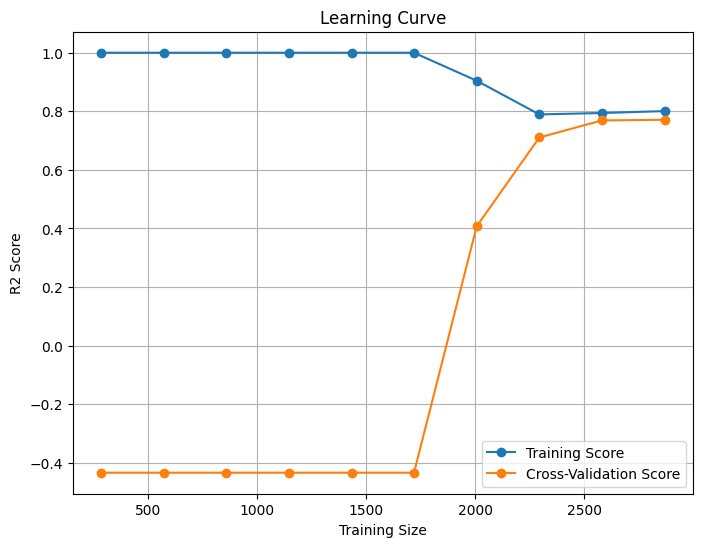

In [77]:
generate_learing_curve_plot(ada_boost_tuned, data_frame)

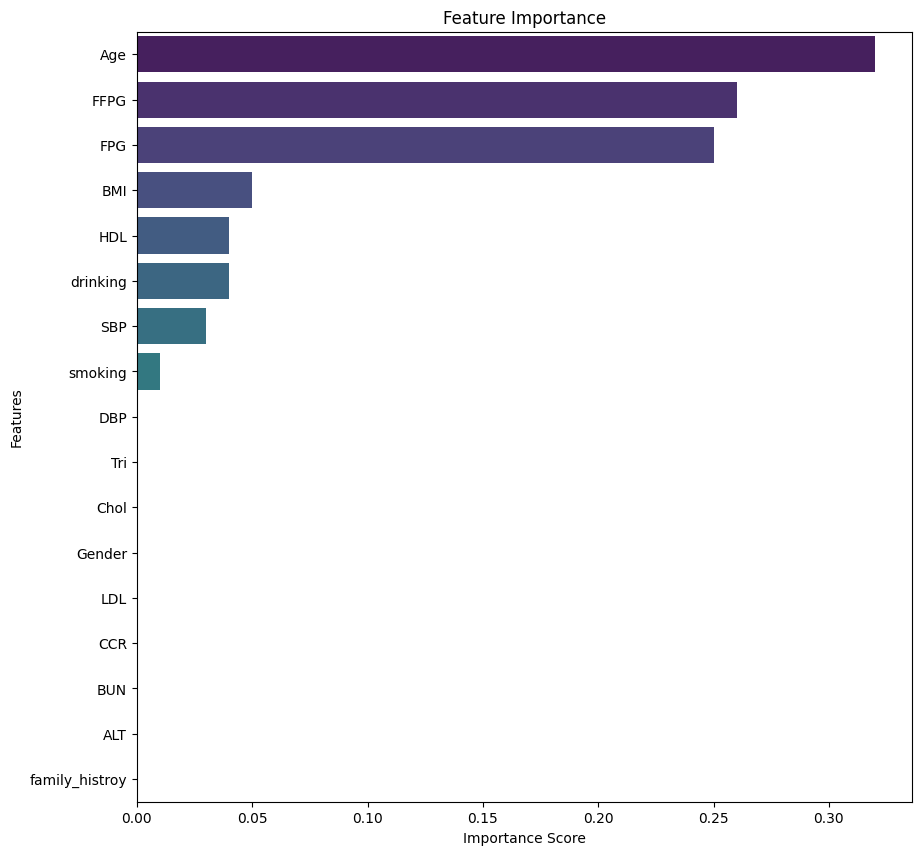

In [78]:
generate_feature_importance_plot(ada_boost_tuned, data_frame)

### Gradient Boosting with hyperparameter tuning

In [79]:
gradient_grid_params = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate": [0.01, 0.1, 0.02, 0.05],
    "max_depth": [1, 3, 4, 5]
}

In [ ]:
gradient_grid_search = GridSearchCV(
    estimator=gradient_boosting, 
    param_grid=gradient_grid_params, 
    cv=3, 
    scoring="accuracy", 
    n_jobs=-1
)

gradient_grid_search.fit(X_train, y_train)

gradient_tuned = gradient_grid_search.best_estimator_
gradient_tuned_pred = gradient_tuned.predict(X_test)

print(f"Gradient Boost Tuned Accuracy: {accuracy_score(y_test, gradient_tuned_pred)}")
print(f"Best params: {gradient_grid_search.best_params_}")

Gradient Boost Tuned Accuracy: 0.943089430894309
Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


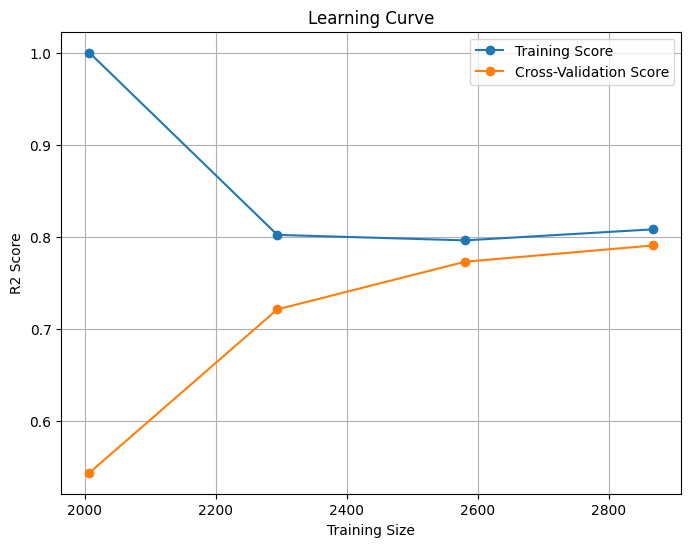

In [82]:
generate_learing_curve_plot(gradient_tuned, data_frame)

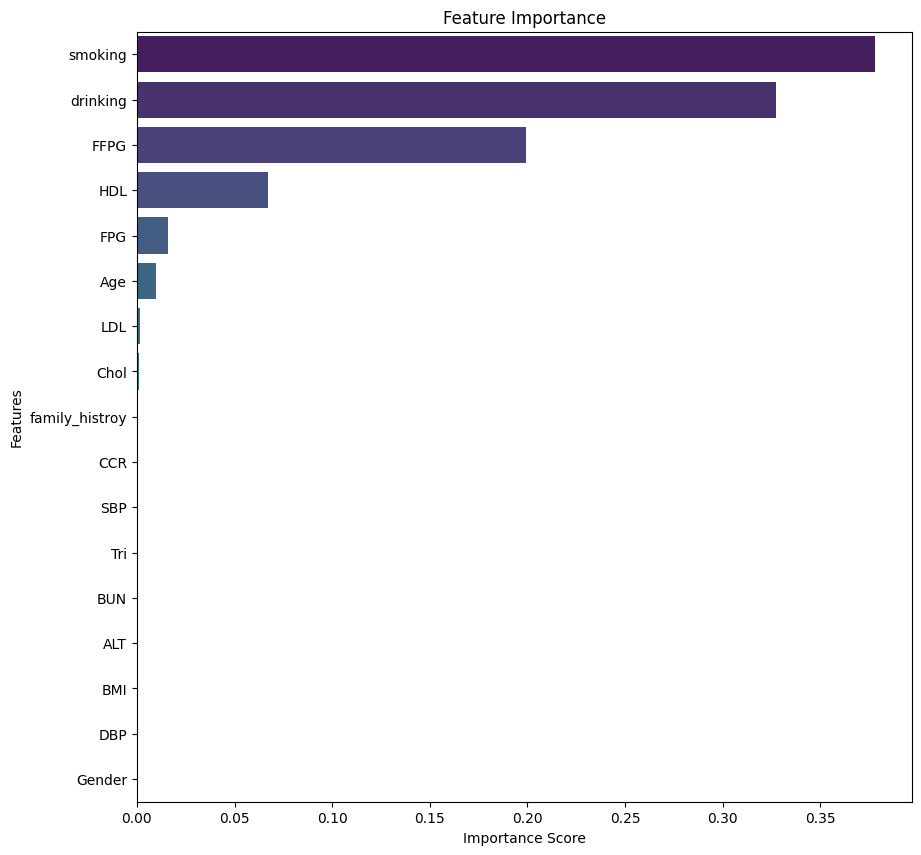

In [83]:
generate_feature_importance_plot(gradient_tuned, data_frame)

### XGBoost with hyperparameter tuning

In [85]:
xgb_grid_params = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate": [0.01, 0.1, 0.02, 0.05],
    "max_depth": [1, 3, 4, 5],
    "subsample": [0.2, 0.6, 0.8, 1.0]
}

In [ ]:
xgb_grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=xgb_grid_params, 
    cv=3, 
    scoring="accuracy", 
    n_jobs=-1
)

xgb_grid_search.fit(X_train, y_train)

xgb_tuned = xgb_grid_search.best_estimator_
xgb_tuned_pred = xgb_tuned.predict(X_test)

print(f"XGBoost Tuned Accuracy: {accuracy_score(y_test, xgb_pred)}")
print(f"Best params: {xgb_grid_search.best_params_}")

XGBoost Tuned Accuracy: 0.9396051103368177
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.2}


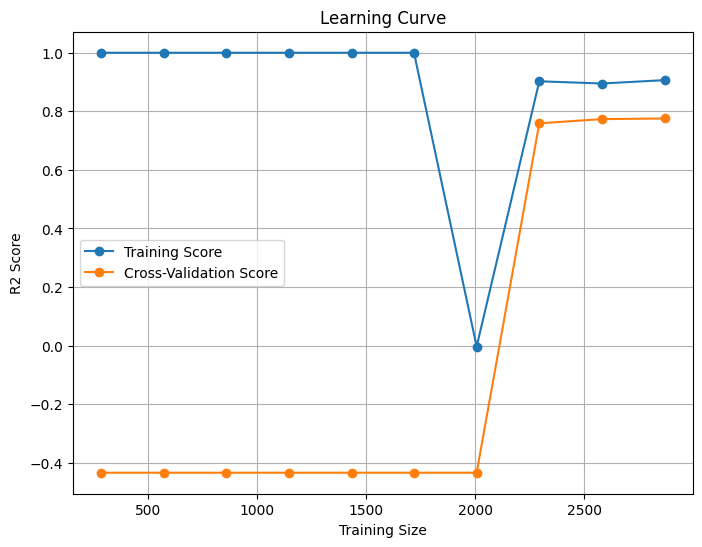

In [93]:
generate_learing_curve_plot(xgb_tuned, data_frame)

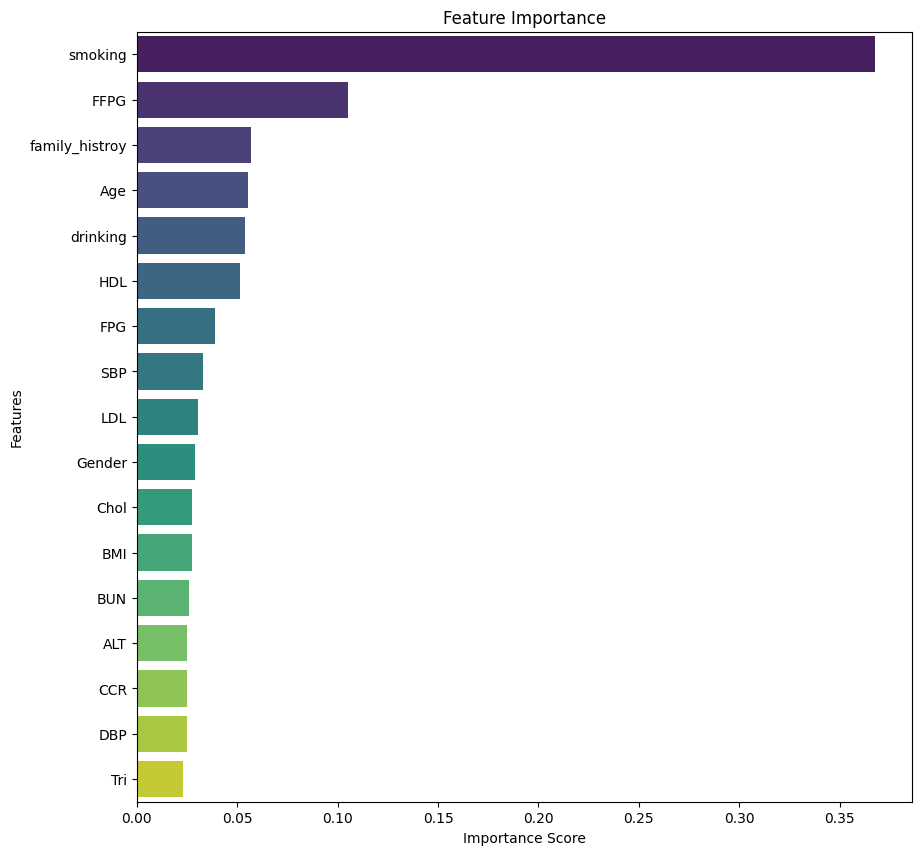

In [94]:
generate_feature_importance_plot(xgb_tuned, data_frame)

### XGBoost with regularization

In [91]:
xgb_reg_grid_params = {
    "min_child_weight": [2, 5, 10],
    "gamma": [0.5, 1, 1.5, 4],
    "subsample": [0.6, 0.8, 1],
    "colsample_bytree": [0.2, 0.6, 1.0],
    "max_depth": [2, 3, 4, 5],
    "reg_alpha": [0, 0.05, 0.1, 0.5, 1],
    "reg_lambda": [0, 0.05, 0.1, 0.5, 1],
}

In [92]:
xgb_grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_reg_grid_params, 
    cv=3, 
    scoring="accuracy", 
    n_jobs=-1
)

xgb_grid_search.fit(X_train, y_train)

xgb_regularization = xgb_grid_search.best_estimator_
xgb_regularization_pred = xgb_regularization.predict(X_test)

print(f"XGBoost With Regularization Accuracy: {accuracy_score(y_test, xgb_regularization_pred)}")
print(f"Best params: {xgb_grid_search.best_params_}")

XGBoost With Regularization Accuracy: 0.9465737514518002
Best params: {'colsample_bytree': 1.0, 'gamma': 4, 'max_depth': 4, 'min_child_weight': 2, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 0.8}


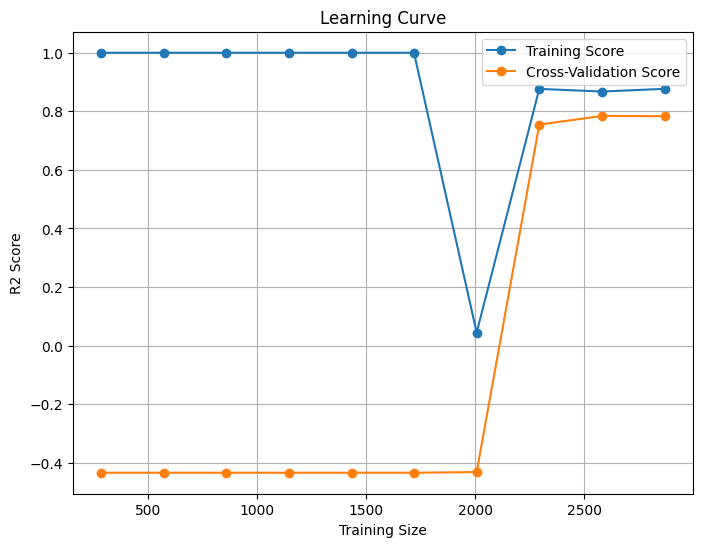

In [95]:
generate_learing_curve_plot(xgb_regularization, data_frame)

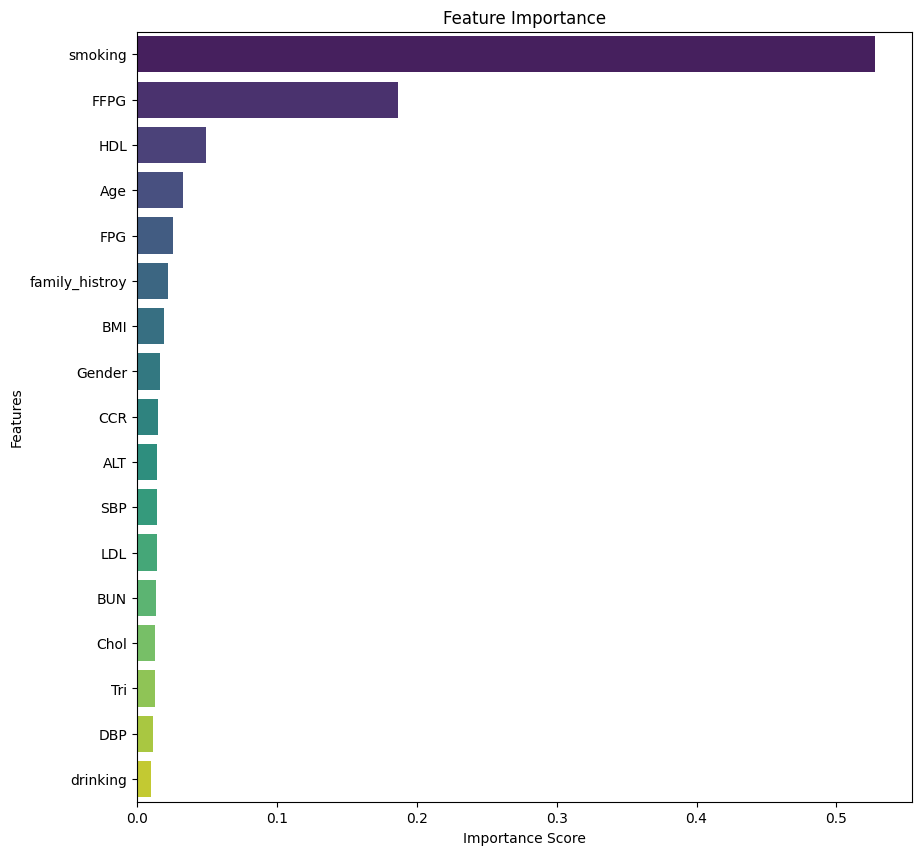

In [96]:
generate_feature_importance_plot(xgb_regularization, data_frame)

### Gradient Boosting with regularization

In [112]:
gradient_reg_grid_params = {
    "n_estimators": [100, 200], 
    "learning_rate": [0.01, 0.1, 0.2], 
    "max_depth": [3, 5, 7], 
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "subsample": [0.8, 1.0],
    "ccp_alpha": [0.0, 0.1, 0.5, 1.0]
}

In [113]:
gradient_grid_search = GridSearchCV(
    estimator=gradient_boosting,
    param_grid=gradient_reg_grid_params, 
    cv=3, 
    scoring="accuracy", 
    n_jobs=-1
)

gradient_grid_search.fit(X_train, y_train)

gradient_regularization = gradient_grid_search.best_estimator_
gradient_regularization_pred = gradient_regularization.predict(X_test)

print(f"Gradient Boosting With Regularization Accuracy: {accuracy_score(y_test, gradient_regularization_pred)}")
print(f"Best params: {gradient_grid_search.best_params_}")

Gradient Boosting With Regularization Accuracy: 0.943089430894309
Best params: {'ccp_alpha': 0.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 1.0}


In [114]:
models = {
    "AdaBoost": ada_pred,
    "Gradient Boosting": gradient_boosting_pred,
    "XGBoost": xgb_pred,
    "AdaBoost with params tuning": ada_boost_tuned_pred,
    "Gradient Boosting with params tuning": gradient_tuned_pred,
    "XGBoost with params tuning": xgb_tuned_pred,
    "XGBoost with regularization": xgb_regularization_pred,
    "Gradient Boosting regularization": gradient_regularization_pred,
}

In [115]:
for name, model_pred in models.items():
    print(name)
    print(classification_report(y_test, model_pred))

AdaBoost
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.95      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861

Gradient Boosting
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.95      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861

XGBoost
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.93      0.84      0.88       237

    accuracy                           0.94       861
   macro avg       0.94      0.91      0.92       861
weighted avg       0.94      0.94      

В цій лаболаторній я намагався оцінити роботу моделей та підібрати найкращі параметри для трьох бустінгових моделей `AdaBoost`, `Gradient Boosting`, `XGBoost`.

Трішки інформації про точності моделей:
- `AdaBoost` - показала доволі хорошу точність `0.943089` без додаткових налаштувань проте якщо трішки підкорегувати вхідні параметри точність трішки покращується `0.944250`
- `Gradient Boosting` - початкова точність без налаштувань `0.944250`, точність після налаштувань параметрів трішки впала `0.943089` також при додаванні регуляризаційних параметрів точність не змінюється `0.943089`
- `XGBoost` - Початкова точність `0.939605`, точність після додавання параметрів не змінилась `0.939605` але після доодавання регуляризаційних параметрів точність трішки змінилась в кращу сторону `0.946573`

На мою думку ідеальною бустінг моделлю у нашому випадку буде `Gradient Boosting` так як вона доволі швидко та без лишніх налаштувань показала одну з найкращих точностей його основною перевагою є те що він може фіксувати складні шаблони в датасетах що робить його ідеальним для даної задачі. На рахунок інших моделей можу сказати те що вони не сильно відстають по ефективності від `Gradient Boosting` проте потребують більш тонких налаштувань для досягнення такої ж ефективності.